In [22]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [23]:
# 필요한 라이브러리 불러오기
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import accuracy_score
import graphviz
from sklearn.preprocessing import LabelEncoder

In [24]:
# 데이터 불러오기 (비식별화된 데이터)
file_path = '익명화_임금_데이터셋.csv'
df = pd.read_csv(file_path, encoding='cp949', sep=';')

In [25]:
# LabelEncoder를 사용하여 'name' 열을 숫자로 변환
le_name = LabelEncoder()
df['이름'] = le_name.fit_transform(df['이름'])

In [26]:
# LabelEncoder를 사용하여 'sex' 열을 숫자로 변환
le_sex = LabelEncoder()
df['성별'] = le_sex.fit_transform(df['성별'])

In [27]:
# 종속 변수와 독립 변수 분리
X = df.drop('임금', axis=1)
y = df['임금']

In [28]:
# '60M'을 숫자로 변경
y = y.replace({'>60M': 1, '<=60M': 0})

In [29]:
# 학습 데이터와 테스트 데이터로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
# 의사결정트리 모델 학습
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [31]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

In [32]:
# 성능 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'모델 정확도: {accuracy:.2f}')

모델 정확도: 0.97


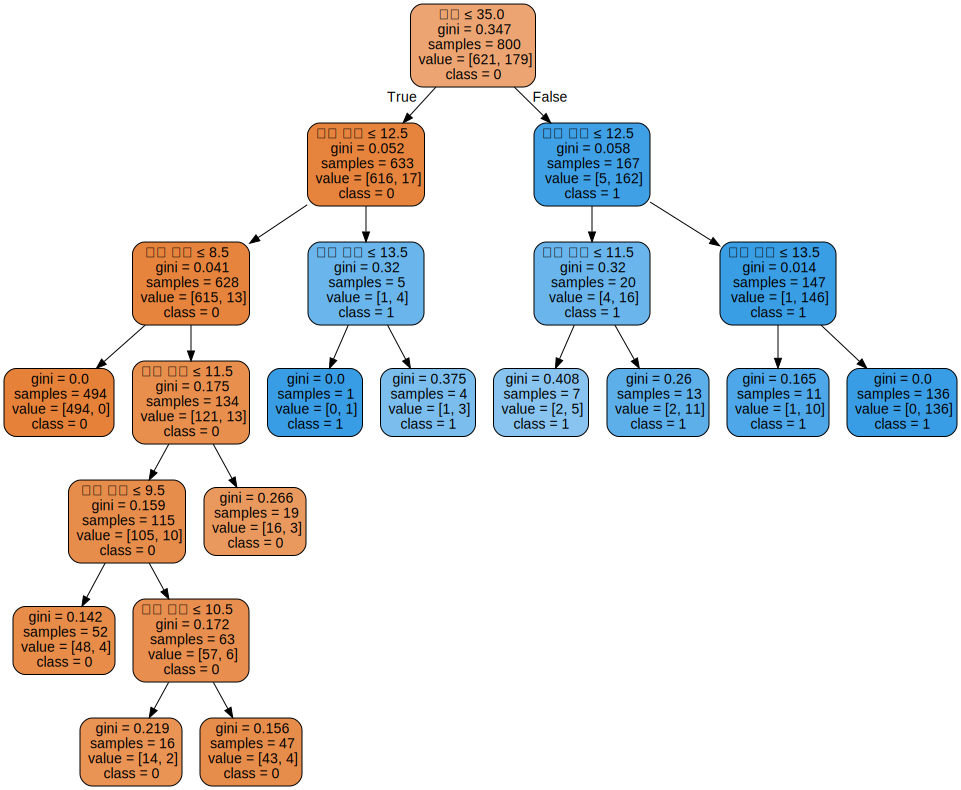

In [33]:
# 트리 시각화 (Graphviz)
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=[str(c) for c in y.unique()],  # y의 고유값을 사용하여 클래스 이름 설정
                           filled=True, rounded=True, special_characters=True)
display(graphviz.Source(dot_data))